In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import solve
from numpy.linalg import inv

def generate_impedance(frequencies):
    R = 50
    C = 1e-6
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return np.abs(impedance)

# Génération des fréquences de 40Hz à 200MHz.
X = np.linspace(40, 200e6, 1000).reshape(-1, 1)

# Génération des impédances correspondantes.
y = generate_impedance(X)



kernel with impedance data

Test on DRT1

before solve


/tmp/ipykernel_1277/4274429870.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


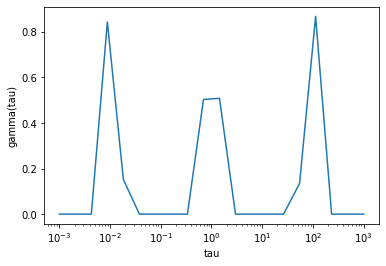

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/(1+(2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)



R_inf = 0.1
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()


DRT 1 

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)



R_inf = 0.1
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R1*C
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R1)
print("C vaut :", C)
print("RC =",RC)



before solve


/tmp/ipykernel_1277/3001787274.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


DRT3

before solve


/tmp/ipykernel_777/3233477372.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


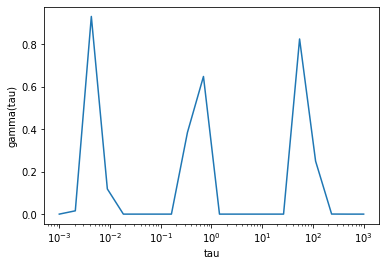

max index :  17
max tau :  0.004281332398719395
R vaut : 1
C vaut : [[ 3.  6.]
 [ 6. 14.]]
RC = 100


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R1*C1
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R1)
print("C vaut :", C)
print("RC =",RC)

changement de phi 

In [ ]:

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.where(np.abs(x - y) < 1e-9, 1, 0)

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 4  # Ohms
C1 = 100  # Farads
R2=4
C2=1
R3= 4
C3= 1e-2

R_inf = 1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R*C
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R)
print("C vaut :", C)
print("RC =",RC)

before solve


/tmp/ipykernel_777/2743803799.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


KeyboardInterrupt: 

In [ ]:
def find_peaks(gamma_values, tau_values, n_peaks=6):
    # Trouvons les indices des n_peaks plus grands gamma
    peak_indices = np.argpartition(-gamma_values, n_peaks)[:n_peaks]

    # Récupérons les valeurs correspondantes de tau
    peak_taus = tau_values[peak_indices]

    # Récupérons les valeurs correspondantes de gamma
    peak_gammas = gamma_values[peak_indices]

    # Tri par ordre croissant de tau
    sorted_indices = np.argsort(peak_taus)
    peak_taus = peak_taus[sorted_indices]
    peak_gammas = peak_gammas[sorted_indices]

    return peak_taus, peak_gammas

# Utilisation de la fonction
peak_taus, peak_gammas = find_peaks(gamma_values, tau_values, n_peaks=6)

for i in range(6):
    print(f"Pic {i+1} : tau = {peak_taus[i]}, gamma = {peak_gammas[i]}")
    print('ln tau :',np.log(peak_taus[i]))


Pic 1 : tau = 0.004281332398719395, gamma = 2.115143004895299
ln tau : -5.45349100972274
Pic 2 : tau = 0.008858667904100828, gamma = 1.7899996662445765
ln tau : -4.726358875093041
Pic 3 : tau = 0.3359818286283784, gamma = 1.6938442780562228
ln tau : -1.0906982019445475
Pic 4 : tau = 0.6951927961775604, gamma = 2.224518187417806
ln tau : -0.3635660673148497
Pic 5 : tau = 54.555947811685186, gamma = 2.3378782431122858
ln tau : 3.9992267404633424
Pic 6 : tau = 112.8837891684689, gamma = 1.6324688253105029
ln tau : 4.726358875093041


Avec célia et variation de Sigma

/tmp/ipykernel_292/2743803799.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


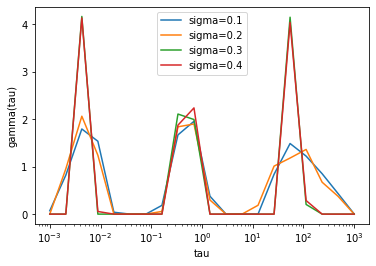

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [0.1, 0.2, 0.3, 0.4]

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')

# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

before solve


/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


before solve
before solve
before solve


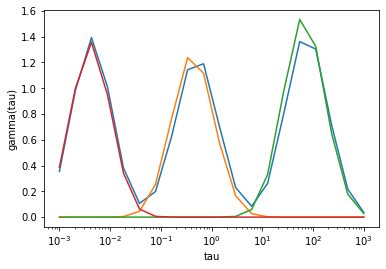

In [ ]:

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.8

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.exp(-(sigma*(x - y))**2)

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 4  # Ohms
C1 = 100  # Farads
R2=4
C2=1
R3= 4
C3= 1e-2

R_inf = 1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)
# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)
# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp2 = R_inf + real_part(frequencies,R2,C2) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp2, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp3 = R_inf + real_part(frequencies,R1,C1) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp3, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp3 = R_inf + real_part(frequencies,R3,C3) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp3, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()



In [ ]:
# Utilisation de la fonction
peak_taus, peak_gammas = find_peaks(gamma_values, tau_values, n_peaks=6)

for i in range(6):
    print(f"Pic {i+1} : tau = {peak_taus[i]}, gamma = {peak_gammas[i]}")
    print('ln tau :',np.log(peak_taus[i]))

Pic 1 : tau = 0.004281332398719395, gamma = 1.393412606095456
ln tau : -5.45349100972274
Pic 2 : tau = 0.008858667904100828, gamma = 1.0107410511045252
ln tau : -4.726358875093041
Pic 3 : tau = 0.3359818286283784, gamma = 1.143507737283755
ln tau : -1.0906982019445475
Pic 4 : tau = 0.6951927961775604, gamma = 1.1901816431835668
ln tau : -0.3635660673148497
Pic 5 : tau = 54.555947811685186, gamma = 1.3622111445980276
ln tau : 3.9992267404633424
Pic 6 : tau = 112.8837891684689, gamma = 1.304696823128798
ln tau : 4.726358875093041


/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


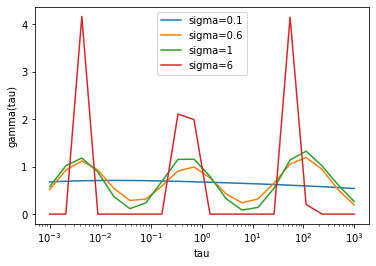

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [0.1, 0.6, 1, 6]

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')

# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


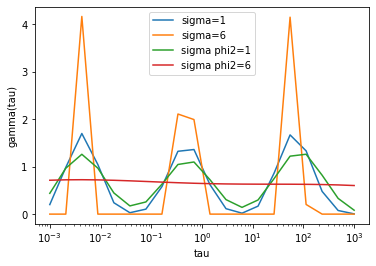

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [1, 6]
# La fonction de base, ici une gaussienne

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))
# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma phi2={sigma}')
# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

Calcul tu temps 

In [ ]:
import time
sigma=1
# Liste des fonctions phi
phi_functions = [
    lambda x, y, sigma: np.exp(-sigma*(x - y)**2),
    lambda x, y, sigma: np.exp(-((x - y)**2)/(2*sigma**2)),
    lambda x, y, sigma: np.where(np.abs(x - y) < 1e-9, 1, 0),
    # Ajoutez d'autres fonctions phi ici si nécessaire
]

# Pour chaque fonction phi
for i, phi_func in enumerate(phi_functions):
    # Modifie la fonction phi globale
    def phi(x, y, sigma):
        return phi_func(x, y, sigma)
    
    # Marque le début du temps
    start_time = time.time()

    # Recalcule x
    x = solve(Z_exp, R_inf, frequencies, A)

    # Marque la fin du temps
    end_time = time.time()

    # Calcule et affiche le temps écoulé
    elapsed_time = end_time - start_time
    print(f"Temps écoulé pour la fonction phi {i+1} : {elapsed_time} secondes")



/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


Temps écoulé pour la fonction phi 1 : 50.35950946807861 secondes
Temps écoulé pour la fonction phi 2 : 66.81464767456055 secondes
Temps écoulé pour la fonction phi 3 : 76.82757306098938 secondes


Calcul de l'erreur sur Lambda mauvais code car intégré dans une fonciton prend les valeurs d'avant

Lancement d'un run


/tmp/ipykernel_292/404306658.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))
/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


Lancement d'un run
Lancement d'un run


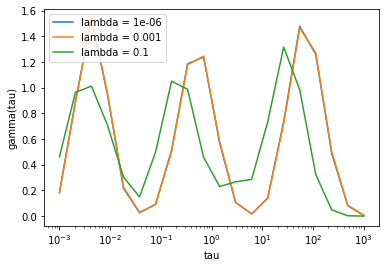

In [ ]:
# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.exp(-(sigma*(x - y))**2)

def run_simulation(lmbda):
    # Paramètres
    sigma = 0.9
    frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)
    M = len(frequencies)
    ln_tau = np.log(1/(2*np.pi*frequencies))

    def Zdrt(R_inf, x, f):
        tau_values = 1/(2*np.pi*frequencies)
        integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
        return R_inf + integral_approx

    def gamma(x, tau):
        return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

    def L(x, Z_exp, R_inf, f, A):
        Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
        return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

    def solve(Z_exp, R_inf, f, A):
        x0 = np.random.rand(M)  
        bounds = [(0, None) for _ in range(M)]
        res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
        return res.x

    R1 = 4  
    C1 = 100  
    R2=4
    C2=1
    R3= 4
    C3= 1e-2
    R_inf = 1
    Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)
    A = np.random.rand(M, M) 
    x = solve(Z_exp, R_inf, frequencies, A)
    return x

lmbdas = [1e-6, 1e-3, 1e-1]
plt.figure()

for lmbda in lmbdas:
    print("Lancement d'un run")
    x = run_simulation(lmbda)
    plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau], label=f'lambda = {lmbda}')

plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()
plt.show()


DRT avec kernel gausian au lieu de ridge 

/tmp/ipykernel_292/3496975757.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


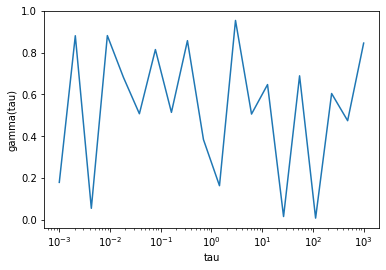

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Paramètres
sigma = 0.1
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

# La fonction gamma
def gamma(x, tau):
    M = len(frequencies)
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# Cette fonction calcule une matrice de noyau K où chaque élément K[i, j] est le résultat
# du noyau gaussien calculé entre X[i] et X[j].
def gaussian_kernel_matrix(X, sigma):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = np.exp(-(X[i] - X[j])**2 / (2*sigma**2))
    return K

def kernel_regression_method1(X, y, x0, sigma, pw=0.000001):
    N = X.shape[0]  # Nombre de points de données
    I = np.identity(N)  # Matrice identité de taille N

    # Calcul de la matrice de noyau K
    K = gaussian_kernel_matrix(X, sigma)

    # Inversion de la matrice K + pw*I. L'ajout de pw*I est une technique de régularisation pour éviter 
    # les problèmes numériques lors de l'inversion d'une matrice qui pourrait être singulière ou mal conditionnée.
    Kinv = inv(K + pw*I)

    # Calcul des coefficients a, qui sont utilisés pour pondérer les contributions de chaque point de données 
    # lors de la prédiction des valeurs de y pour de nouveaux points de données.
    a = np.matmul(Kinv, y)

    # Calcul des valeurs prédites y0 pour les points de prédiction x0.
    M = x0.shape[0]  # Nombre de points de prédiction
    y0 = np.zeros(M)
    for i in range(M):
        for j in range(N):
            y0[i] += a[j] * np.exp(-(x0[i] - X[j])**2 / (2*sigma**2))

    return y0

# Initialisation aléatoire de x
x = np.random.rand(len(frequencies))

# Calcul de y (gamma(tau) pour chaque tau)
y = np.array([gamma(x, np.exp(t)) for t in ln_tau])

# Estimation de x en utilisant la méthode de régression par noyau gaussien
x_estimated = kernel_regression_method1(ln_tau, y, ln_tau, sigma)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x_estimated, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()
